In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Closed_deals

In [4]:
# carga del dataset y muestreo de 10 registros aleatorios
Closed_deals = pd.read_csv('Datasets_original/olist_closed_deals_dataset.csv')
Closed_deals.sample(10)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
514,d92949512f85bf2db92ad19b662922f6,0502e5d79bd91b34b68cef9b3b45230c,9d12ef1a7eca3ec58c545c678af7869c,068066e24f0c643eb1d089c7dd20cd73,2018-05-18 19:32:40,health_beauty,online_medium,eagle,NaN,NaN,NaN,reseller,NaN,0.0
548,10d6786c2646e4ef82973b3045096882,fb66238168277301f44d960416bf5c1f,34d40cdaf94010a1d05b0d6212f9e909,9ae085775a198122c5586fa830ff7f2b,2018-10-05 12:35:50,fashion_accessories,online_small,cat,NaN,NaN,NaN,manufacturer,NaN,0.0
47,413e4eb37de01f40522e28ecdc268639,d9d057968270cdb30c14cba606d5dc90,4b339f9567d060bcea4f5136b9f5949e,495d4e95a8cf8bbf8b432b612a2aa328,2018-03-29 17:48:42,car_accessories,online_medium,NaN,NaN,NaN,NaN,reseller,NaN,0.0
550,8999714b474171439f0c56236609a287,4ac30efebddcd090914475c8201899b4,fdb16d3cbbeb5798f2f66c4096be026d,9ae085775a198122c5586fa830ff7f2b,2018-01-29 02:00:00,home_decor,industry,NaN,NaN,NaN,NaN,reseller,NaN,0.0
705,79c57bf41c34485dfe8b0d15d45a5fa2,11742f81550ac064cc9a40f67151d9ad,370c9f455f93a9a96cbe9bea48e70033,de63de0d10a6012430098db33c679b0b,2018-05-31 21:24:31,home_appliances,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
189,4de20dd98d2ca78fd643bdc4f0a6359b,1cbdc7cf130a41fd13a3c2a7d2fcfda7,9e4d1098a3b0f5da39b0bc48f9876645,6565aa9ce3178a5caf6171827af3a9ba,2018-03-16 19:39:38,bed_bath_table,offline,eagle,NaN,NaN,NaN,reseller,NaN,0.0
133,bd0027406f48f714d12dc1de747133cf,f89e46b812b06f22508f89873565ce6c,56bf83c4bb35763a51c2baab501b4c67,56bf83c4bb35763a51c2baab501b4c67,2018-04-30 20:24:05,food_supplement,offline,NaN,NaN,NaN,NaN,reseller,NaN,0.0
545,6fb435d98ce368e0b727cec0f8a2ccfb,fac1a9017ade7bdc94058fc1c969f355,4b339f9567d060bcea4f5136b9f5949e,fbf4aef3f6915dc0c3c97d6812522f6a,2018-04-27 12:39:38,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
103,080261e4427a081fc6e637b654f590ee,ade45994b717ccee333492330fbf037b,068066e24f0c643eb1d089c7dd20cd73,85fc447d336637ba1df43e793199fbc8,2018-03-14 12:18:20,audio_video_electronics,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
730,07f26c1e7d2873a9e6860909c00075c2,134c69b4dff67e40a022dd8bf81e002e,0a0fb2b07d841f84fb6714e35c723075,85fc447d336637ba1df43e793199fbc8,2018-05-15 17:20:12,construction_tools_house_garden,offline,eagle,NaN,NaN,NaN,reseller,NaN,0.0


In [5]:
# tamaño del dataset
Closed_deals.shape

(842, 14)

In [6]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [7]:
# descripcion de las columnas numéricas
Closed_deals.describe()

,declared_product_catalog_size,declared_monthly_revenue
count,69.000000,8.420000e+02
mean,233.028986,7.337768e+04
std,352.380558,1.744799e+06
min,1.000000,0.000000e+00
25%,30.000000,0.000000e+00
50%,100.000000,0.000000e+00
75%,300.000000,0.000000e+00
max,2000.000000,5.000000e+07


In [8]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariciones
Closed_deals.describe(include=['O'])

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type
count,842,842,842,842,842,841,836,665,63,64,66,832
unique,842,842,32,22,824,33,8,9,2,2,6,3
top,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-04 03:00:00,home_decor,online_medium,cat,True,True,5-20,reseller
freq,1,1,140,133,6,105,332,407,58,54,22,587


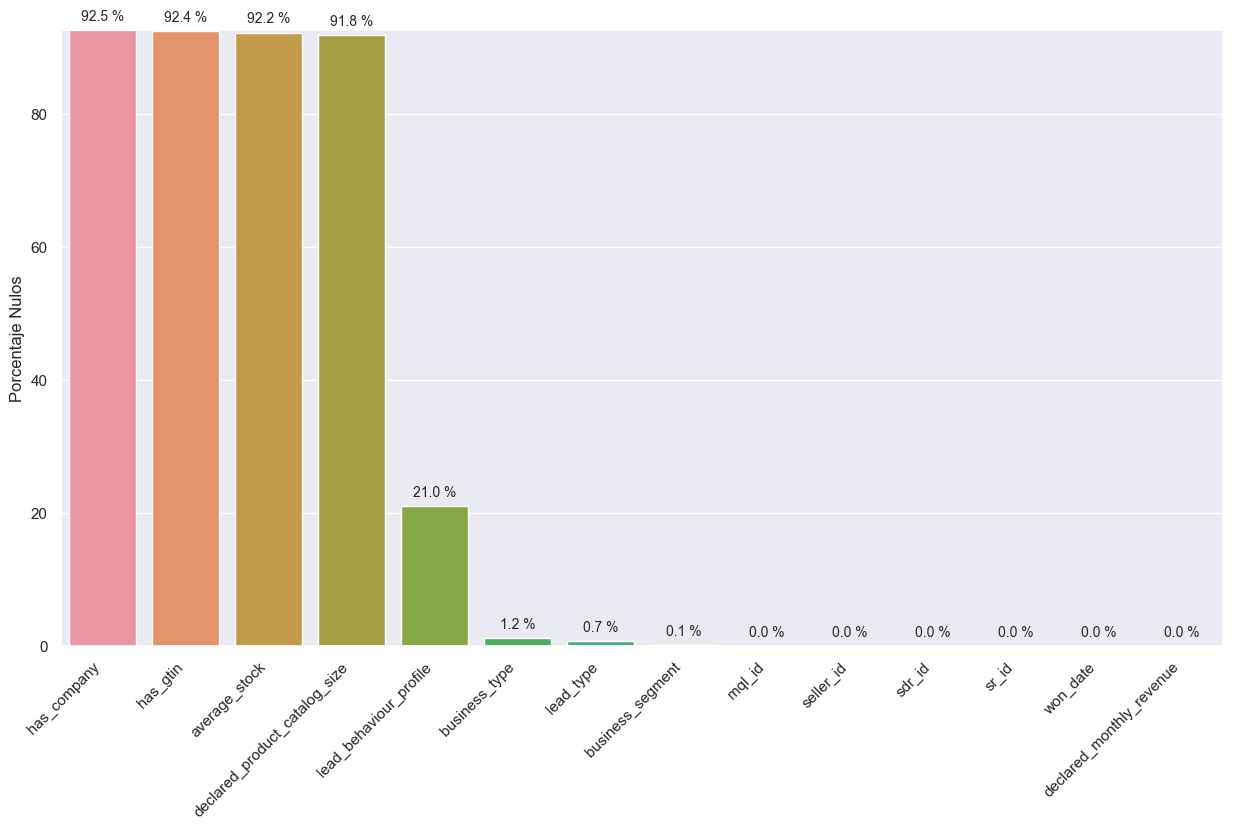

In [9]:
# cuantos datos nulos por columna se encuentran
valores=Closed_deals.isna().sum().sort_values(ascending=False)*100/Closed_deals.shape[0]
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8)})

# Establecer los datos
ax = sns.barplot(x=valores.index, y=valores)

# Establecer etiquetas
ax.set_ylabel('Porcentaje Nulos')
plt.xticks(rotation=45,ha='right')

ax.set_ylim(top=valores.max())

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=1))+" %", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

# Mostrar la gráfica
plt.show()

- De un total de 842 registros las columnas has_company, has_gtin, average_stock y declared_product_catalog_size tiene mas del 90 % de sus datos faltantes
- Esta tabla no aporta datos muy relevantes

## Customers

In [10]:
# carga del dataset y muestreo de 10 registros aleatorios
Customers = pd.read_csv('Datasets_original/olist_customers_dataset.csv')
Customers.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
90474,fb0a5f198af9146879712f3fc2afb788,4871fa68534498e54aa3064b07a7717f,13073,campinas,SP
61464,472a60102b712260191100bc3f41c070,0cf146e84935a5208ef3047a2b64ae4b,2056,sao paulo,SP
51301,8ef7c689216e12ab959d9003a6c4b3b9,3d6465ac2502decfdfa5ab1e1a915a54,48850,itiuba,BA
6913,6d68392b4769c127c8bff89994d745e3,815a6b3971fa68915c80101a220905e4,9450,rio grande da serra,SP
25669,827c1daa83bce414dcebbeb2959bb555,a660768f87f5460dead886e622dd5741,94030,gravatai,RS
55791,3422a239d7c7bf95b72216d779a28de6,1aba41ff60afaade1aadfc1eeb30f87f,71907,brasilia,DF
12126,fe947adaad7a3db48e9ac07b358e6aa2,b66b0221baecbab9ebf88bc4494cc659,17960,monte castelo,SP
32298,9c0f4ac6b6891be32bf81369e8bc1ed4,900d1496ce4999f49f045b4b378ee0f3,13660,porto ferreira,SP
34001,aca362e0744d36fb0975539a8b8aab37,c8f25042cc8c47c3dee2541f1ca92b93,4552,sao paulo,SP
43278,8d0c69a20b7069397a53a0c2f6ea4c0c,ad7c9286abfd06762b553040264bdf3d,6268,osasco,SP


In [11]:
# tamaño del dataset
Customers.shape

(99441, 5)

In [12]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
# descripcion de las columnas numéricas 
Customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [14]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Customers.describe(include=['O'])

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


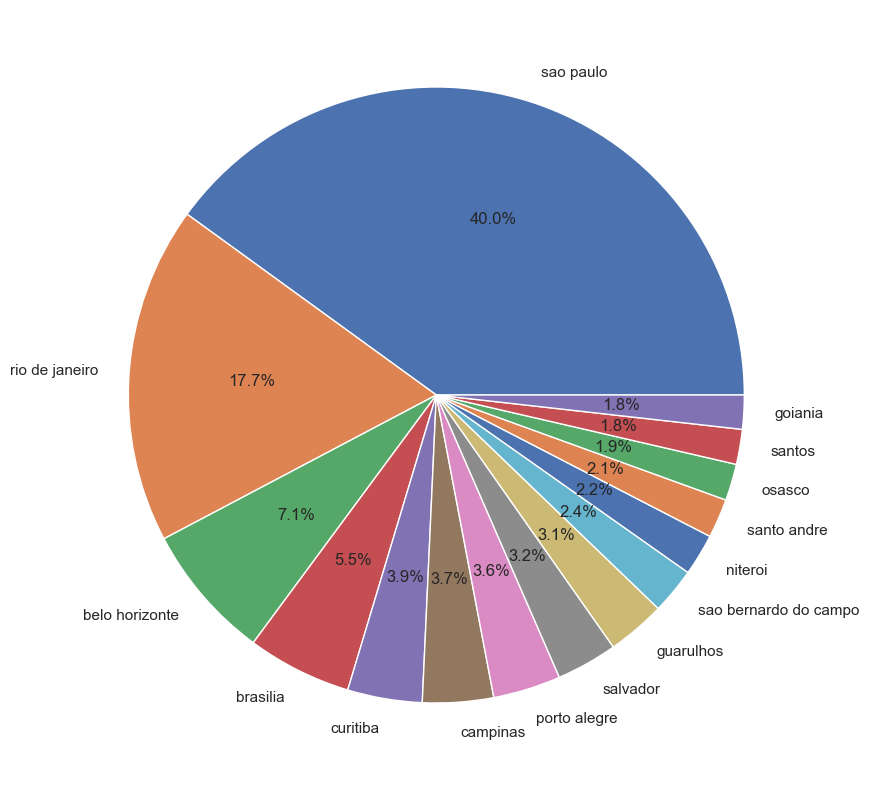

In [15]:
#15 ciudades con mayor cantidad de clientes
val=Cantidad_por_ciudad=Customers.groupby(["customer_city"]).count().sort_values(by=["customer_id"],ascending=False).drop_duplicates("customer_id")["customer_id"].head(15)
plot = val.plot.pie(ylabel="",subplots=True, figsize=(20, 10),autopct='%1.1f%%')

- Analizando Customers faltan datos de customers_unique_id que no hay referencia de como fueron creados esos codigos
- Esta tabla se puede utilizar para saber de qué ciudades provienen los consumos

## Geolocation

In [16]:
# carga del dataset y muestreo de 10 registros aleatorios
Geolocation = pd.read_csv('Datasets_original/olist_geolocation_dataset.csv')
Geolocation.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
74323,4022,-23.594013,-46.649207,sao paulo,SP
409912,20271,-22.917750,-43.220400,rio de janeiro,RJ
885014,86010,-23.310702,-51.161513,londrina,PR
343156,14804,-21.767684,-48.208023,araraquara,SP
532293,29190,-19.823857,-40.265856,aracruz,ES
267968,12061,-23.005381,-45.559549,taubaté,SP
364532,16800,-21.123968,-51.099997,mirandopolis,SP
925066,89258,-26.489905,-49.055772,jaragua do sul,SC
926951,89205,-26.308943,-48.828171,joinville,SC
65312,3756,-23.507965,-46.504565,sao paulo,SP


In [17]:
# tamaño del dataset
Geolocation.shape

(1000163, 5)

In [18]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [19]:
# descripcion de las columnas numéricas
Geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [20]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Geolocation.describe(include=['O'])

,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


- Esta tabla puede servir para ubicar las ciudades correctamente en objeto mapa del Dashboard.

## Marketing

In [21]:
# carga del dataset y muestreo de 10 registros aleatorios
Marketing = pd.read_csv('Datasets_original/olist_marketing_qualified_leads_dataset.csv')
Marketing.sample(10)

,mql_id,first_contact_date,landing_page_id,origin
3394,8b2c5535d232cb9ff45a6944915000b1,2018-05-05,58326e62183c14b0c03085c33b9fdc44,social
6445,d2a83dc418ee9d6209d8356fca703f13,2017-07-14,5ce25abc7206b8285aa756867eb2c590,paid_search
1678,1c38fdd837bd814787fd6ea06ec72dc3,2018-04-16,e534a08b23c682d94859d0ab860bd57a,paid_search
4233,4285127686e4b60f9d4c5182571b3982,2018-02-20,b217afa2c1f4cb502423005639878f6d,paid_search
6513,0e55ef5f7354c3851d022f15f418c8b1,2018-05-09,58326e62183c14b0c03085c33b9fdc44,social
4344,1fb0a167e68e4e697611819f9f970c8e,2018-02-22,30077c17f2ec5010a82e37ad8925b95f,direct_traffic
3797,3a92b4654f299c75c507ce37ec1c0c4d,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search
1537,61d62d0476b05d467684cfd3e2a1fe4a,2018-04-13,b76ef37428e6799c421989521c0e5077,organic_search
1709,f2169fa8be6ba030c53e9f81c47c1d99,2018-05-27,58326e62183c14b0c03085c33b9fdc44,unknown
1749,7af61e5f524cea0e7dab3a8dfc4c00d6,2018-01-31,88740e65d5d6b056e0cda098e1ea6313,social


In [22]:
# tamaño del dataset
Marketing.shape

(8000, 4)

In [23]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [24]:
# descripcion de las columnas numéricas
Marketing.describe()

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [25]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Marketing.describe(include=['O'])

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [26]:
# cuantos datos nulos por columna se encuentran
Marketing.isna().sum()*100/Marketing.shape[0]

mql_id                0.00
first_contact_date    0.00
landing_page_id       0.00
origin                0.75
dtype: float64

- Esta tabla no aporta datos significativos para el análisis que queremos realizar

## Order_items

In [27]:
# carga del dataset y muestreo de 10 registros aleatorios
Order_items = pd.read_csv('Datasets_original/olist_order_items_dataset.csv')
Order_items.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
5747,0cf04ba4ccc895b3134799f74e4c2557,1,47cd48073d67f91f09cb5ef9496c920b,33a6f4b1e7cdc205511e76ba1b6e0186,2018-04-24 14:30:27,78.99,38.60
72755,a5de8a72ffd64d3a73ae50d6fdac540a,1,c9599b4c6945cfb6df065039bf5f1555,b4ffb71f0cb1b1c3d63fad021ecf93e1,2017-12-04 22:12:04,17.85,15.10
106960,f313336cf2b038a3ef433d8e48aec4d5,1,6e6bc9eb53618579e6184f84ae04dba9,c70c1b0d8ca86052f45a432a38b73958,2018-05-24 03:12:54,110.32,7.64
35407,5021c4cb8f8fa752b0b12fc72fd72cf4,1,6e77b89d36e50217e6793780a8ce5c82,ea8482cd71df3c1969d7b9473ff13abc,2018-01-15 13:32:54,44.99,14.10
81020,b835a702f116e758be4f80ae292bca2e,1,63ee501f72520d5ec54cef5fd3a21a20,acb6c2ca5c82411c1fdb88d5fd5eb95e,2017-03-21 17:33:50,52.90,18.65
17563,284705e9a68479f4ef401d31e5400948,1,f3720bc68555b1bff49b9ffd41b017ac,9c0e69c7bf2619675bbadf47b43f655a,2017-07-20 16:23:11,199.00,13.73
28781,418018cd21bcca5f7cc37f9f17ac1466,1,5d90b82ad1fdff812987fa28158b7984,1c129092bf23f28a5930387c980c0dfc,2018-01-22 18:29:51,39.90,16.60
90334,cd297c74672655559f2c22ea2a1550eb,1,f045dc40e1d54d2f70286e4cbb07a357,213b25e6f54661939f11710a6fddb871,2018-04-27 11:31:18,39.90,7.71
72495,a5542d780161a0c1c649d4e0f44540c8,2,09cbb58b67d2f010f3ce6ae6196f1ed9,6562efe88ce0826a4ca4f189f03b4b84,2018-01-18 12:35:21,59.90,14.15
45906,68329ea019781f360d7d04e9edd2825d,1,4981f1410716b81db3808ba1c7d21394,e8f6dc8e6a1dcde89d20e3995c8d90b3,2017-05-19 00:46:01,19.90,15.10


In [28]:
# tamaño del dataset
Order_items.shape

(112650, 7)

In [29]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [30]:
# descripcion de las columnas numéricas
Order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


<AxesSubplot: xlabel='price'>

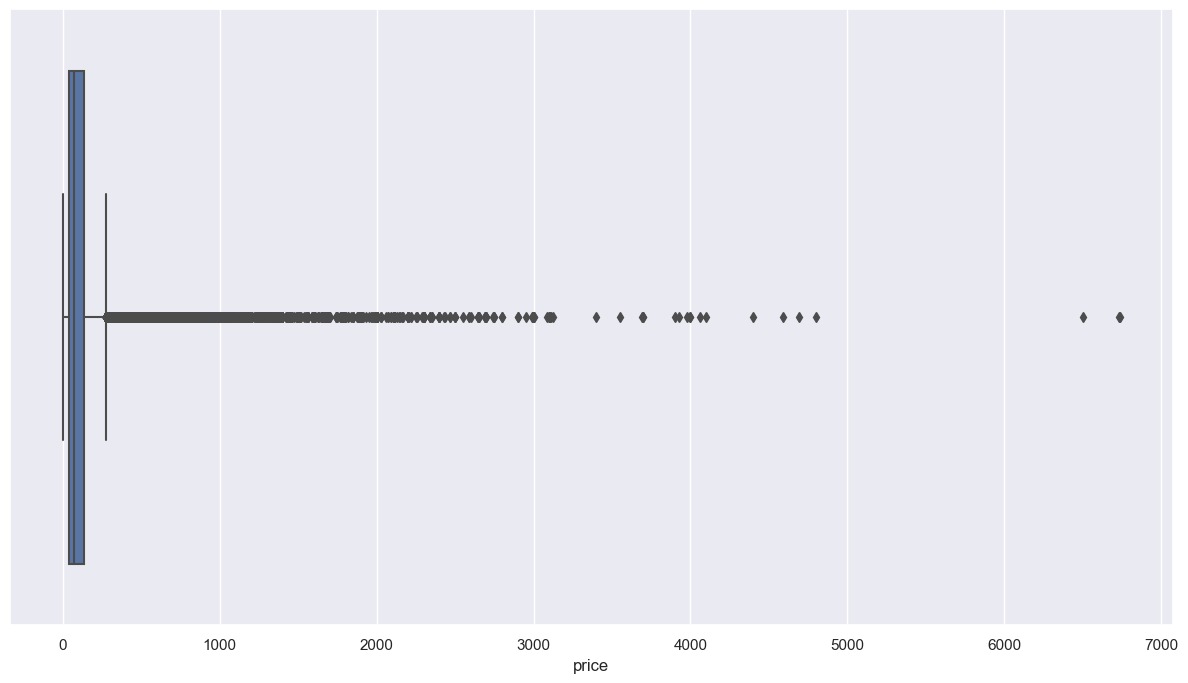

In [31]:
# Detección de outliers
sns.boxplot(x=Order_items.price)

In [32]:
# Rango intercuartil
IQR = Order_items.price.quantile(0.75) - Order_items.price.quantile(0.25)
lower_lim = Order_items.price.quantile(0.25) - 2.5 * IQR
upper_lim = Order_items.price.quantile(0.75) + 2.5 * IQR
outliers_low = Order_items.price < lower_lim
outliers_up = Order_items.price > upper_lim
print("Total de outliers:",(len(Order_items.price[outliers_low]) + len(Order_items.price[outliers_up])))
Order_items[~(outliers_low | outliers_up)].shape

Total de outliers: 5035


(107615, 7)

In [33]:
# Z-Score
z = np.abs(stats.zscore(Order_items.price))
outliers = Order_items.price[(z > 3)].index
print("Total de outliers:", len(outliers))
Order_items.drop(outliers).shape

Total de outliers: 1966


(110684, 7)

In [34]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Order_items.describe(include=['O'])

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


In [35]:
# Revisión de la columna order_item_id; expresa la cantidad incremental de artículos presentes en una misma orden
Order_items[['order_id', 'order_item_id']].groupby(['order_id']).count().sort_values('order_item_id', ascending=False)

,order_item_id
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
ab14fdcfbe524636d65ee38360e22ce8,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
...,...
5a0911d70c1f85d3bed0df1bf693a6dd,1
5a082b558a3798d3e36d93bfa8ca1eae,1
5a07264682e0b8fbb3f166edbbffc6e8,1


In [36]:
# Revisión de la columna product_id; cuál es el producto más vendido
Order_items[['order_id','product_id']].groupby(['product_id']).count().sort_values('order_id', ascending=False)

,order_id
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
...,...
6ca99f05e9c1952a6597264e87f01378,1
6ca54e191592a843087a042b0665d7ef,1
6ca5428af5edb5066b1966ad58501b60,1


In [37]:
# Revisión de la columna product_id; cuánto facturó el producto más vendido
Order_items[['price','product_id']].groupby(['product_id']).sum().sort_values('price', ascending=False)

,price
product_id,
bb50f2e236e5eea0100680137654686c,63885.00
6cdd53843498f92890544667809f1595,54730.20
d6160fb7873f184099d9bc95e30376af,48899.34
d1c427060a0f73f6b889a5c7c61f2ac4,47214.51
99a4788cb24856965c36a24e339b6058,43025.56
...,...
2e8316b31db34314f393806fd7b6e185,2.99
680cc8535be7cc69544238c1d6a83fe8,2.90
8a3254bee785a526d548a81a9bc3c9be,2.55


In [38]:
# Revisión de la columna seller_id; cuál es el vendedor con más órdenes
Order_items[['order_id','seller_id']].groupby(['seller_id']).count().sort_values('order_id', ascending=False)

,order_id
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...
5f57db27027655e6c6a391601daa0258,1
5e25c632f9db6cfb8bc100421c2737b6,1
5e106d93b717c2682b9383da480364a1,1


In [39]:
# Revisión de la columna seller_id; cuánto sumaron las órdenes de cada vendedor
Order_items[['price','seller_id']].groupby(['seller_id']).sum().sort_values('price', ascending=False)

,price
seller_id,
4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
53243585a1d6dc2643021fd1853d8905,222776.05
4a3ca9315b744ce9f8e9374361493884,200472.92
fa1c13f2614d7b5c4749cbc52fecda94,194042.03
7c67e1448b00f6e969d365cea6b010ab,187923.89
...,...
34aefe746cd81b7f3b23253ea28bef39,8.00
702835e4b785b67a084280efca355756,7.60
1fa2d3def6adfa70e58c276bb64fe5bb,6.90


## Order_payments

In [40]:
# carga del dataset y muestreo de 10 registros aleatorios
Order_payments = pd.read_csv('Datasets_original/olist_order_payments_dataset.csv')

In [41]:
Order_payments.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
49851,dfda82f701815b8d9306b1343ca3e2bd,1,debit_card,1,98.34
39142,a985d695ba083a66246dd48086ad4cab,1,credit_card,1,9.99
72932,6e66eeb2dcd054d228cbfdbe27ac10ba,1,credit_card,1,424.82
85943,ae0151b8759ce9b2938f7d0796b9b964,1,credit_card,1,128.48
12065,bf36b37f7569ba312ffe5abb914fc5bf,1,boleto,1,127.41
59946,ef02392a4753ae9d3777f16b5feca9c7,1,boleto,1,312.31
95299,3152fc55dfa364d38d44c5defcb88a28,1,credit_card,1,50.70
391,f6e638ae1f17003aac1cb6dc6a93ba73,1,credit_card,1,79.88
99688,f417219cc64e796bb6bcd1a41d3fe308,1,credit_card,1,55.69
7484,bd4e6b477357e3e0a953996ceff60c2f,1,credit_card,5,96.22


In [42]:
# tamaño del dataset
Order_payments.shape

(103886, 5)

In [43]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [44]:
# descripcion de las columnas numéricas
Order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [45]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Order_payments.describe(include=['O'])

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


- El comportamiento de los pagos. La utilidad dependerá de la propuesta del PO

## Order_reviews

In [46]:
# carga del dataset y muestreo de 10 registros aleatorios
Order_reviews = pd.read_csv('Datasets_original/olist_order_reviews_dataset.csv')
Order_reviews.sample(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
47281,3dc764dff31175f2b0adcf91f55e5d39,dbf13fbeffe18a8079ff256049421669,5,Recomendo,Produto de boa qualidade.,2018-04-28 00:00:00,2018-04-29 00:33:46
70960,64bdd947e52a4e36625f36505e18c8eb,41d0050b0a103c674289659fdd6f602e,5,NaN,Otimo,2017-08-25 00:00:00,2017-08-28 22:52:36
73378,4815fb966b3623f883b006fe1a054ac0,12aef789cfc998f5f44ddf27c24e354d,1,NaN,NaN,2017-08-13 00:00:00,2017-08-13 10:15:49
82988,8965f7ba4479a0287d67738883579acb,ee24cd508ad57fcffb82c94f9839b7cb,5,Super recomendo,NaN,2018-08-18 00:00:00,2018-08-22 17:43:40
80174,7fe73ce30c264d0f20841ba0394b2867,e2210e9067554988ff724209b5b7a474,5,NaN,NaN,2017-08-29 00:00:00,2017-08-31 19:30:54
71506,3415c9f764e478409e8e0660ae816dd2,4d808ed2901ed7dfebbb74bf1cbb74f6,5,NaN,NaN,2018-07-31 00:00:00,2018-07-31 23:11:57
27089,64ab0350a1c453a591de42e71ac54dd0,2ecc1d9cebb1daded906e43f4c445a5f,3,NaN,Muito boa,2017-11-09 00:00:00,2017-11-11 14:11:51
55235,cc1411d93115abff5b8d5c5dc4407cee,edb5ab08b946e1947a7cbb9f7752594c,5,NaN,Parabens pelos serviços,2017-10-18 00:00:00,2017-10-19 21:14:56
66353,c875e213600d9c500cd8f71499e75b43,b15e9d1741046124ba4bf5c7dd4e5a8a,5,NaN,NaN,2017-08-23 00:00:00,2017-08-24 15:39:31
66378,108a42713e93d7575062c00da3777864,44d079b84edcef02c872e157438940e7,3,NaN,o mostrador do mp3 está de cabeça para a baixo...,2017-06-24 00:00:00,2017-06-25 13:22:51


In [47]:
# tamaño del dataset
Order_reviews.shape

(99224, 7)

In [48]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [49]:
# descripcion de las columnas numéricas
Order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [50]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Order_reviews.describe(include=['O'])

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,11568,40977,99224,99224
unique,98410,98673,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,423,230,463,4


In [51]:
# cuantos datos nulos por columna se encuentran
Order_reviews.isna().sum()*100/Order_reviews.shape[0]

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

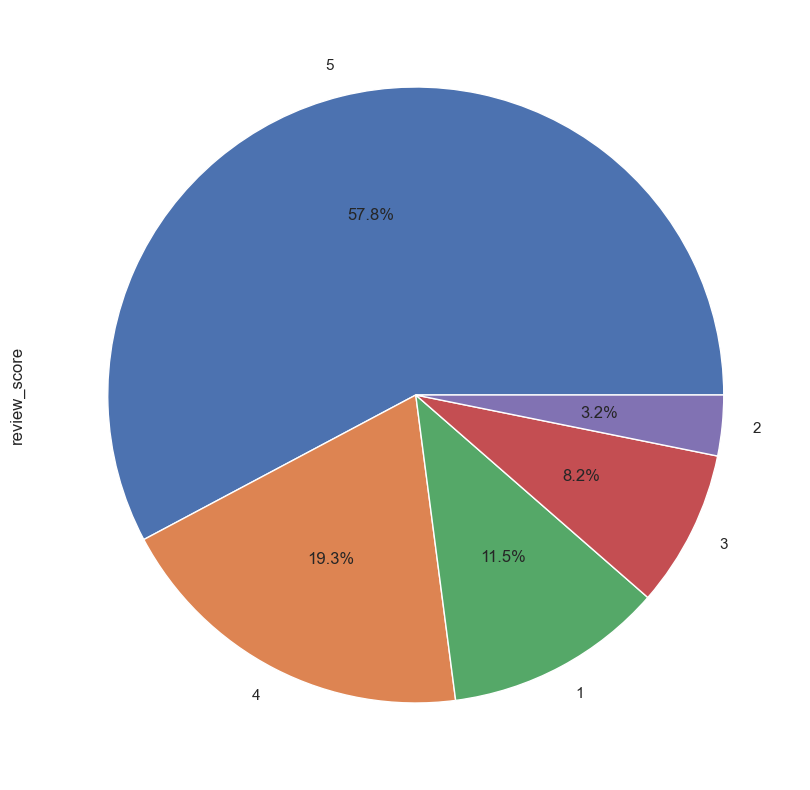

In [52]:
val=Order_reviews.review_score.value_counts()
plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

- La utilidad de esta tabla dependerá del objetivo propuesto.

## Orders

In [53]:
# carga del dataset y muestreo de 10 registros aleatorios
Orders = pd.read_csv('Datasets_original/olist_orders_dataset.csv')
Orders.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
76932,6002f6fd11937a1461a6c4780232191e,bce76905ad97b841d0dfd550f4e16b1d,delivered,2017-09-18 23:29:20,2017-09-20 02:39:58,2017-09-21 15:27:20,2017-09-29 20:56:25,2017-10-09 00:00:00
10611,27314dd49dbc0ad19247637e181e7300,168928af643f9a9710fa8326f21ea2af,delivered,2018-07-16 18:58:58,2018-07-16 19:10:13,2018-07-20 11:36:00,2018-07-21 17:11:44,2018-07-26 00:00:00
28961,3b056e92067a43aaa660bc71598dc68e,52b3da34f204c7de2c9ee201e1491664,delivered,2017-11-25 18:51:06,2017-11-25 18:57:35,2017-11-28 22:11:28,2017-12-04 21:05:13,2017-12-11 00:00:00
52996,c5e8cbed3be23c7ede875b40cba35527,477008aed7b2d717c7eb1cae190cc9c4,delivered,2018-04-01 16:07:07,2018-04-01 16:27:35,2018-04-04 01:28:42,2018-04-18 16:36:37,2018-05-08 00:00:00
94979,9f3d413d603e92e1256f70cc2c0b4f85,c710c7d0242be91d1336d7e6569d7d4b,delivered,2018-03-11 14:17:20,2018-03-11 15:00:21,2018-03-13 19:11:03,2018-03-14 20:32:01,2018-03-22 00:00:00
48889,d7fba1b443490052282949e0f188dff7,d4ad196d33104e1e10a2c3da4323b03b,delivered,2017-09-15 18:48:53,2017-09-16 18:55:10,2017-09-19 18:09:45,2017-10-04 18:42:25,2017-10-16 00:00:00
78520,e42404a21e1f2985aa073939b8375da5,fccdeafeeb46d7a1e258e97b5801db6f,delivered,2017-12-20 22:59:28,2017-12-22 02:50:49,2018-01-19 22:58:58,2018-01-25 11:36:34,2018-01-15 00:00:00
52185,53e36d11c76231e0071729977fd0a90a,23456b8fa364475d41ff13e408d9447d,delivered,2018-05-09 11:53:08,2018-05-09 12:15:29,2018-05-10 16:39:00,2018-05-30 14:38:29,2018-06-11 00:00:00
8224,d3dda8df7e8aa849ce52346514bdb885,34a989f546130d326970d7f3f160e9ea,delivered,2017-08-14 17:42:03,2017-08-14 17:55:24,2017-08-16 17:12:47,2017-08-17 20:23:55,2017-08-30 00:00:00
39846,c12658dc350b49b1970455764f1137f3,79c50087220a5bc7f7d990c39aad78e7,delivered,2018-02-22 14:50:05,2018-02-22 15:08:33,2018-02-23 21:08:25,2018-03-29 23:18:38,2018-03-21 00:00:00


In [54]:
#En la columna orders se puede agregar una nueva columna que contenga la cantidad de dias entre
#la aprobacion de una compra y su entrega al cliente.

Orders['Tiempo_entrega'] = pd.to_datetime(Orders["order_approved_at"]) - pd.to_datetime(Orders['order_delivered_customer_date'])

#Transformar los valores a solo días
Orders['Tiempo_entrega'] = Orders['Tiempo_entrega'].apply(lambda x: x.days + (x.seconds // 86400)) 

In [55]:
# tamaño del dataset
Orders.shape

(99441, 9)

In [56]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   Tiempo_entrega                 96462 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [57]:
# descripcion de las columnas numéricas
Orders.describe()

,Tiempo_entrega
count,96462.000000
mean,-12.642844
std,9.520822
min,-209.000000
25%,-16.000000
50%,-10.000000
75%,-7.000000
max,6.000000


In [58]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Orders.describe(include=['O'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


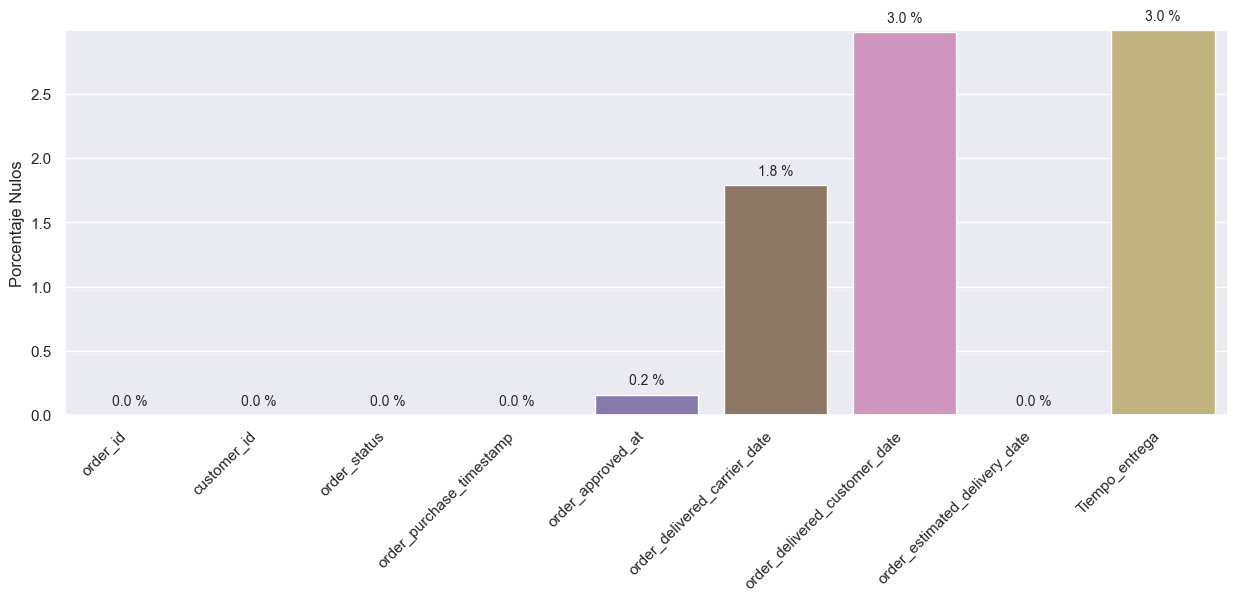

In [59]:
# cuantos datos nulos por columna se encuentran
valores=Orders.isna().sum()*100/Orders.shape[0]

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})

# Establecer los datos
ax = sns.barplot(x=valores.index, y=valores)

# Establecer etiquetas
ax.set_ylabel('Porcentaje Nulos')
plt.xticks(rotation=45,ha='right')

ax.set_ylim(top=valores.max())

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=1))+" %", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

# Mostrar la gráfica
plt.show()

- La utilidad de esta tabla dependerá del objetivo.

## Products

In [60]:
# carga del dataset y muestreo de 10 registros aleatorios
Products = pd.read_csv('Datasets_original/olist_products_dataset.csv')
Products.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
31500,8751413c85ce4cea7d99f15ee76d76c7,cama_mesa_banho,57.0,179.0,1.0,1250.0,45.0,10.0,15.0
17036,3181a2cda00b1579d8ac2519f8820139,pet_shop,50.0,503.0,2.0,1850.0,26.0,15.0,15.0
15446,60963bbf9e011d8eec21c515ff623fba,utilidades_domesticas,56.0,345.0,1.0,900.0,25.0,9.0,23.0
1350,5031f2af0894d36e3f6fe78b6f2d52bc,cama_mesa_banho,57.0,444.0,2.0,1100.0,50.0,16.0,16.0
10838,ff7cbf1b6efcbdb616eaf4e90ca7a467,telefonia,51.0,89.0,1.0,100.0,18.0,6.0,11.0
18110,f1a7551730e920950fb0346630971099,esporte_lazer,63.0,1200.0,4.0,1800.0,70.0,12.0,17.0
29157,5c75915e4a74994308fe805cdbfbf5f5,automotivo,43.0,668.0,2.0,100.0,20.0,15.0,15.0
20412,bf1b2e528a5bb0bbc9c121afd9b9c7ee,informatica_acessorios,48.0,208.0,1.0,100.0,16.0,8.0,12.0
11179,faf1ee0011431f48e299fe92491a14c2,beleza_saude,31.0,707.0,1.0,700.0,26.0,5.0,15.0
11496,e31cf1512c0473f66814000fbc9ad337,esporte_lazer,26.0,418.0,1.0,975.0,32.0,15.0,36.0


In [61]:
# tamaño del dataset
Products.shape

(32951, 9)

In [62]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [63]:
# descripcion de las columnas numéricas
Products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [64]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Products.describe(include=['O'])

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


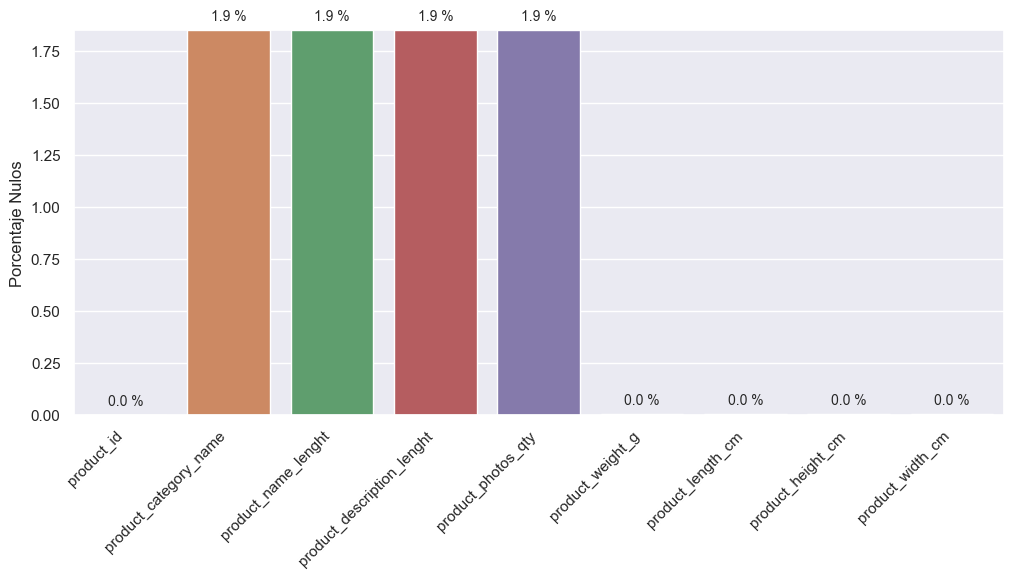

In [65]:
# cuantos datos nulos por columna se encuentran
valores=Products.isna().sum()*100/Products.shape[0]
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,5)})

# Establecer los datos
ax = sns.barplot(x=valores.index, y=valores)

# Establecer etiquetas
ax.set_ylabel('Porcentaje Nulos')
plt.xticks(rotation=45,ha='right')

ax.set_ylim(top=valores.max())

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=1))+" %", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

# Mostrar la gráfica
plt.show()

- La utilidad de esta tabla dependerá del objetivo.

## Sellers

In [66]:
# carga del dataset y muestreo de 10 registros aleatorios
Sellers = pd.read_csv('Datasets_original/olist_sellers_dataset.csv')
Sellers.sample(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2373,d1e2fe627180431ffda076abb303c56f,25900,rio de janeiro,RJ
2668,e504a4e2efaa45cbff7e268a2c58c956,13520,sao pedro,SP
1280,101a3a003516bc11253298b2fad3cb65,13503,rio claro,SP
1006,e0a366315b1b726b6c7832d664c0f530,2258,sao paulo,SP
2055,eba88037e1dca898cd02881f67ced679,3647,sao paulo,SP
175,c0098efcf800861dcae589affca31408,14080,ribeirao preto,SP
192,9e6229250fedbe05838fef417b74e7fb,16800,mirandopolis,SP
2936,0885aaf116795758dfeb5f1032487bcd,8541,ferraz de vasconcelos,SP
2710,403aa86912527d730337ffcb0fb096ab,30220,belo horizonte,MG
2153,2f4b9d112bfa44a214bc6cef085d17c8,29600,afonso claudio,ES


In [67]:
# tamaño del dataset
Sellers.shape

(3095, 4)

In [68]:
# revisamos la distribución de las ciudades (mejor con un gráfico)
Sellers.seller_city.value_counts()

sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: seller_city, Length: 611, dtype: int64

In [69]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [70]:
# descripcion de las columnas numéricas
Sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [71]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Sellers.describe(include=['O'])

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


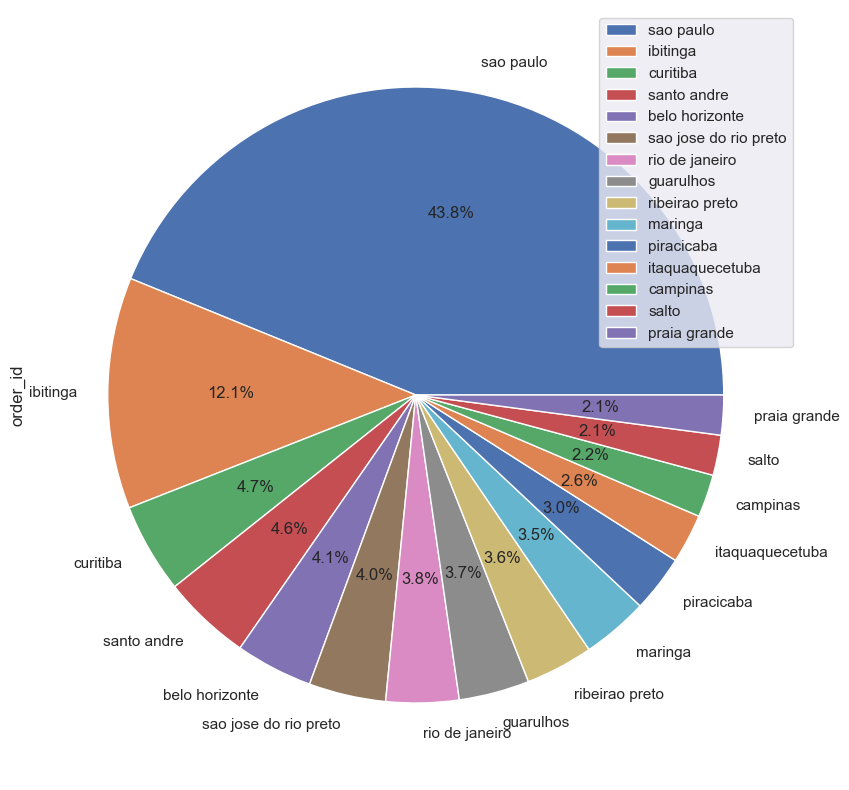

In [72]:
# Revisamos uniendo las tablas, cuál es la ciudad con mayor cantidad de órdenes
val=Sellers.merge(Order_items)[['seller_city','order_id']].groupby(['seller_city']).count().sort_values('order_id', ascending=False).head(15)

plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

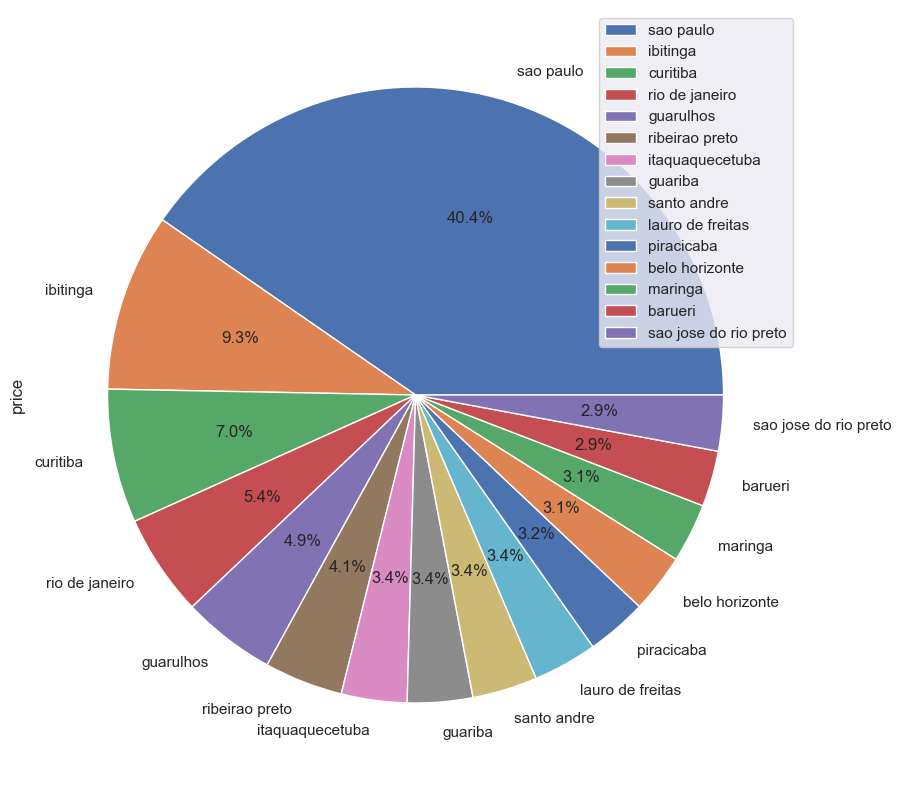

In [73]:
# Revisamos uniendo las tablas, cuál es la ciudad con el monto mayor en ventas
val=Sellers.merge(Order_items)[['seller_city','price']].groupby(['seller_city']).sum().sort_values('price', ascending=False).head(15)
plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

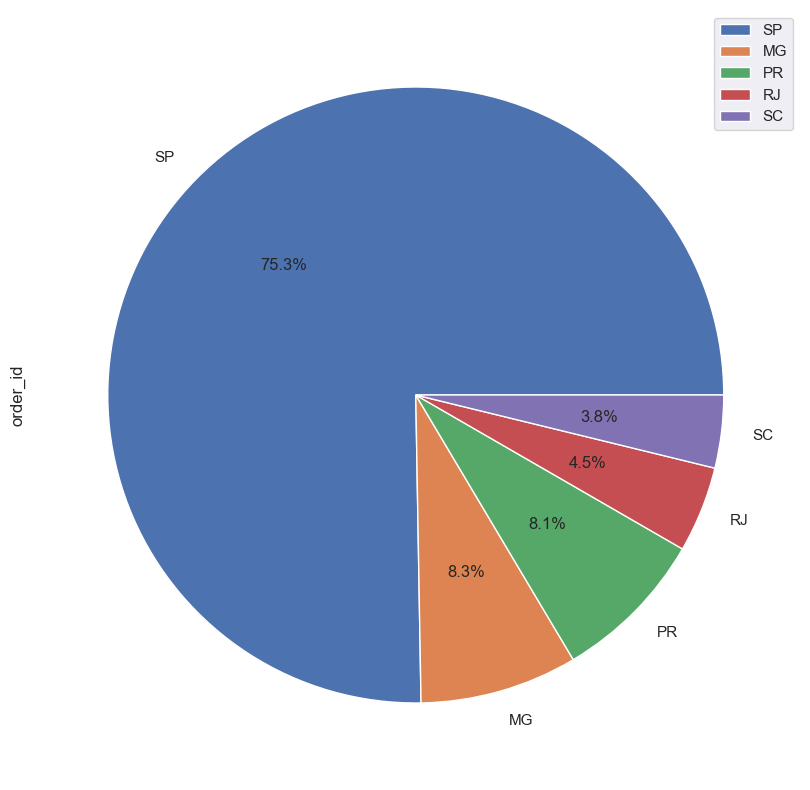

In [74]:
# Revisamos uniendo las tablas, cuál es la provincia con mayor cantidad de órdenes
val=Sellers.merge(Order_items)[['seller_state','order_id']].groupby(['seller_state']).count().sort_values('order_id', ascending=False).head()

plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

## Product_category_name_translation

In [75]:
# carga del dataset y muestreo de 10 registros aleatorios
Product_category_name_translation = pd.read_csv('Datasets_original/product_category_name_translation.csv')
Product_category_name_translation.sample(10)

,product_category_name,product_category_name_english
18,eletroportateis,small_appliances
48,livros_interesse_geral,books_general_interest
45,alimentos,food
34,artigos_de_festas,party_supplies
33,eletrodomesticos,home_appliances
0,beleza_saude,health_beauty
70,seguros_e_servicos,security_and_services
49,construcao_ferramentas_seguranca,construction_tools_safety
27,construcao_ferramentas_jardim,costruction_tools_garden
42,moveis_sala,furniture_living_room


In [76]:
# tamaño del dataset
Product_category_name_translation.shape

(71, 2)

In [77]:
# tipo de datos, no nulos y cantidad de registros para cada columna
Product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [78]:
# como se comportan las variables categóricas-- count=cantidad, unique=registros unicos, top=mas veces registrado, freq=frecuencia de los registros con mas aparariociones
Product_category_name_translation.describe(include=['O'])

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


## Combinacion de datasets y creacion de matriz de correlacion

In [79]:
datasets_combinados=Orders.merge(Order_reviews,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_payments,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_items,on="order_id")
datasets_combinados=datasets_combinados.merge(Sellers,on="seller_id")
datasets_combinados=datasets_combinados.merge(Closed_deals,on="seller_id",how="left")

In [80]:
#Lista de columnas a las que se le aplica label encoder
list_columns = datasets_combinados.select_dtypes(include='object').columns


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Se aplica label encoder a todas las columnas
for col in list_columns:
    datasets_combinados[col] = le.fit_transform(datasets_combinados[col])

<AxesSubplot: >

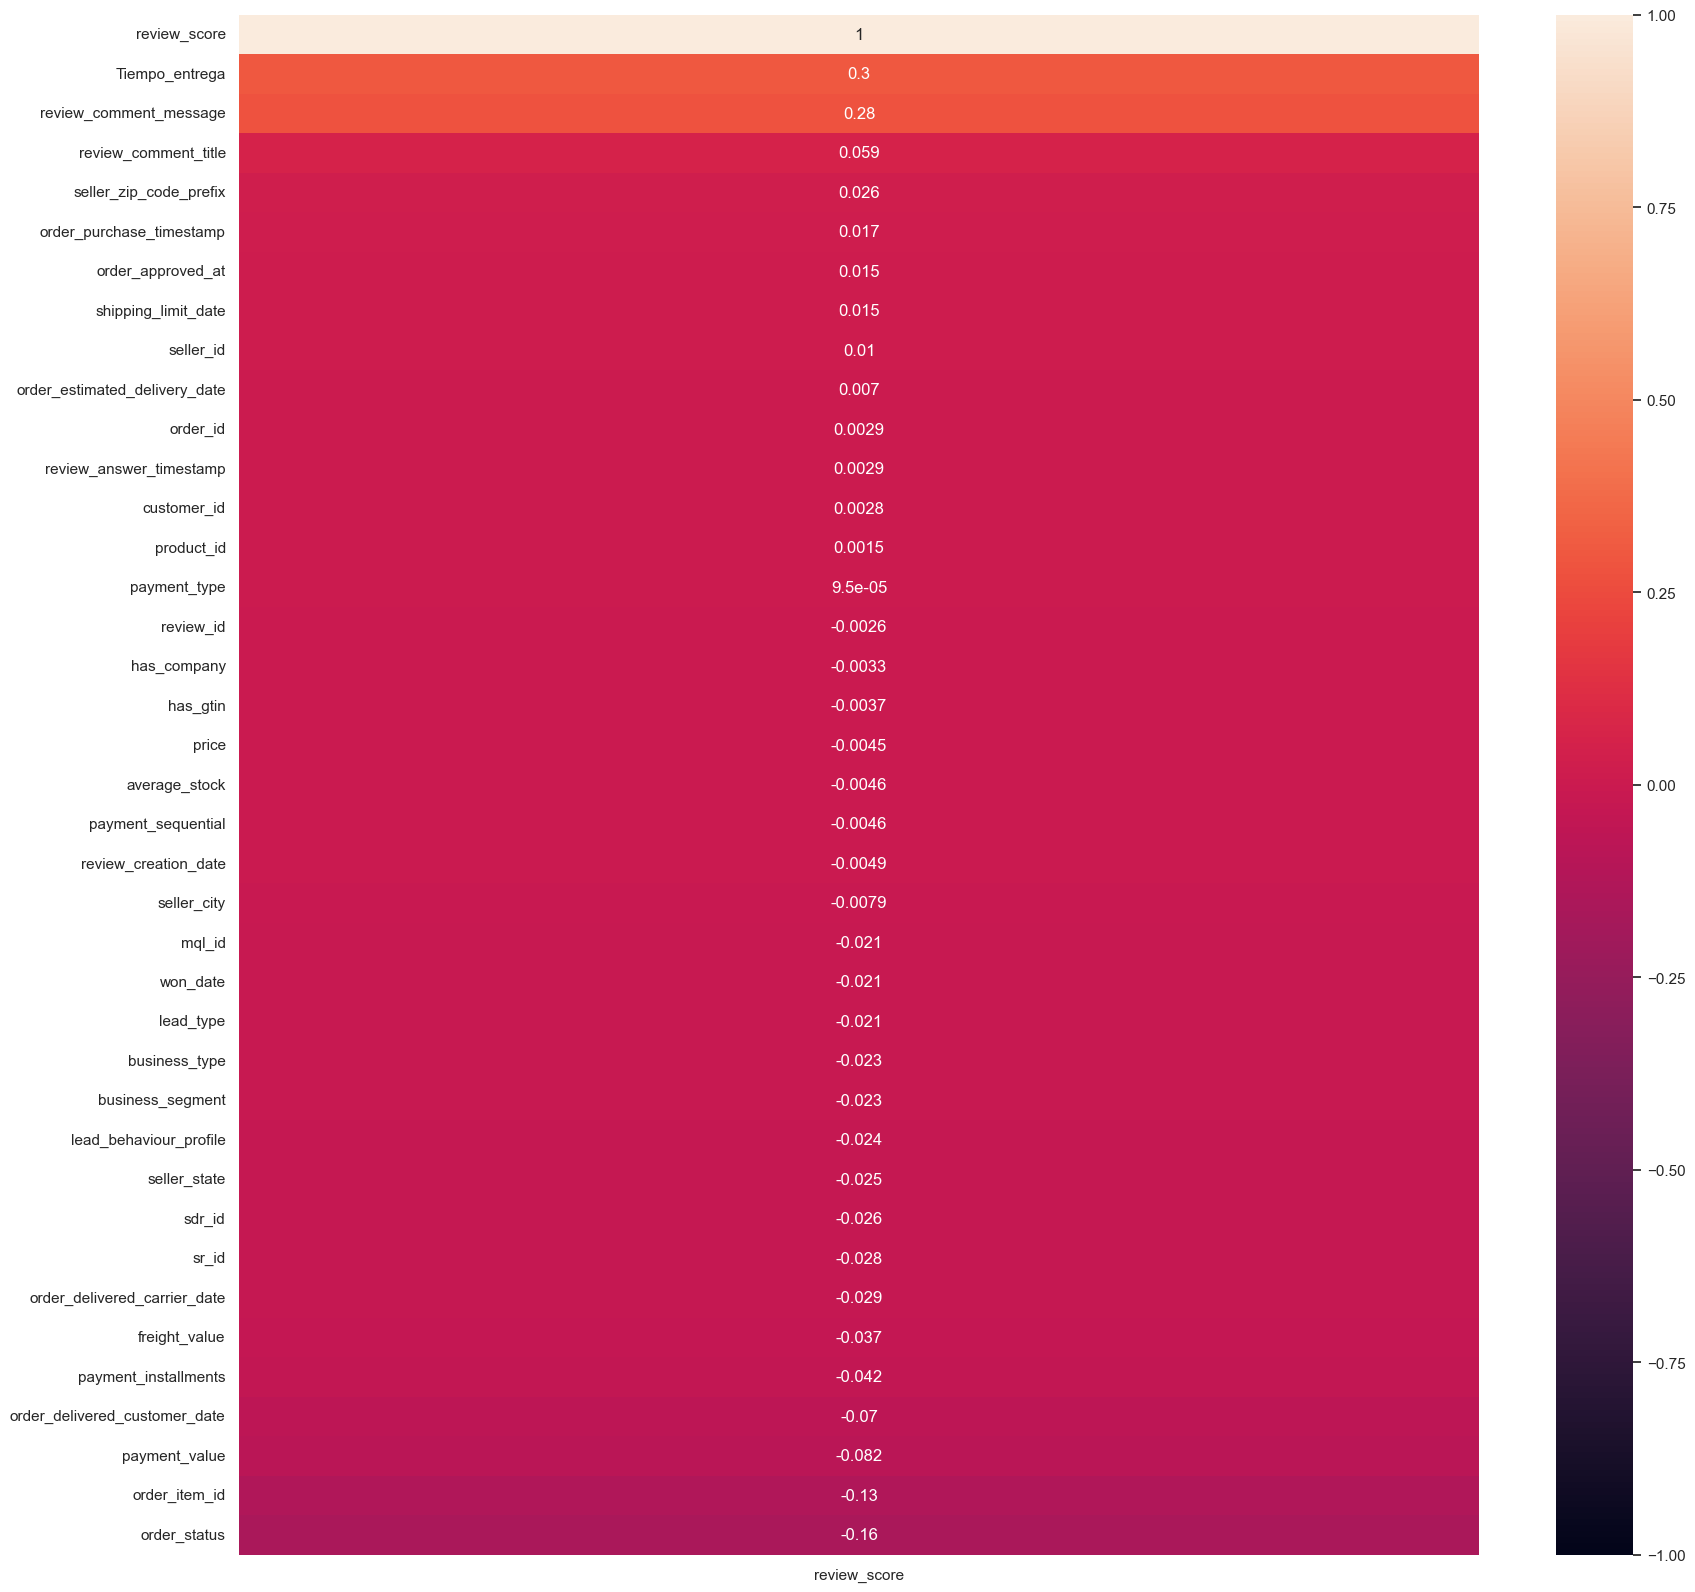

In [81]:
#Se arma otro grafico solo con la columna que se quiere evaluar
corr=datasets_combinados.drop(["declared_monthly_revenue","declared_product_catalog_size"],axis=1).corr()
corr=corr.sort_values(by="review_score",ascending=False)[["review_score"]]
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corr,annot=True,vmin=-1,vmax=+1)

## Tabla valoración vendedor

Armaremos una tabla que nos permita darle una valoración a cada vendedor, basado en diferentes unidades:

- Location (?)
- Amount of distinct products
- Type of products (?)
- Time to fill order
- Review score
- Number of orders
- Number of sales
- Gross income
- Net income

In [82]:
datasets_combinados=Orders.merge(Order_reviews,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_payments,on="order_id")
datasets_combinados=datasets_combinados.merge(Order_items,on="order_id")
datasets_combinados=datasets_combinados.merge(Sellers,on="seller_id")
datasets_combinados=datasets_combinados.merge(Products,on="product_id")

In [83]:
datasets_combinados.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Tiempo_entrega,review_id,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-9.0,a54f0611adc9ed256b57ede6b6eb5114,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-9.0,a54f0611adc9ed256b57ede6b6eb5114,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-9.0,a54f0611adc9ed256b57ede6b6eb5114,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,-3.0,b46f1e34512b0f4c74a72398b03ca788,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,-5.0,dc90f19c2806f1abba9e72ad3c350073,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [84]:
datasets_combinados["Month"] = pd.DatetimeIndex(datasets_combinados["order_approved_at"]).month
datasets_combinados["Year"] = pd.DatetimeIndex(datasets_combinados["order_approved_at"]).year

datasets_combinados['avg_price_month'] = datasets_combinados.groupby(['seller_id','Month',"Year"])['price'].transform('mean')


In [85]:
# Se seleccionan columnas con ID para modificar
columnas = [0,1,9,19,20,21]
datasets_combinados.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'Tiempo_entrega', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'Month',
       'Year', 'avg_price_month'],
      dtype='object')

In [86]:
#Se aplica label encoder a las columnas de ID
for col in columnas:
    datasets_combinados[datasets_combinados.columns[col]] = le.fit_transform(datasets_combinados[datasets_combinados.columns[col]])

In [87]:
Valoracion = pd.DataFrame(columns=['seller_id'])

In [88]:
Valoracion.seller_id = datasets_combinados.seller_id.unique()
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'seller_city']].groupby(['seller_id']).max(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'seller_state']].groupby(['seller_id']).max(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'product_id']].groupby(['seller_id']).count(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'product_category_name']].groupby(['seller_id']).nunique(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'Tiempo_entrega']].groupby(['seller_id']).mean().round(2), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'review_score']].groupby(['seller_id']).mean().round(2), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'order_id']].groupby(['seller_id']).count(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'price']].groupby(['seller_id']).sum(), on= 'seller_id')
Valoracion = Valoracion.merge(datasets_combinados[['seller_id', 'avg_price_month']].groupby("seller_id").mean().reset_index().round(2), on= 'seller_id')

In [89]:
Valoracion.drop_duplicates(inplace=True)

In [90]:
Valoracion.rename({'product_id':'distinct_prod', 'Tiempo_entrega':'delivery_avg', 'product_category_name':'distinct_categories',\
                   'review_score':'review_avg', 'order_id':'total_orders', 'price':'total_income'}, axis=1, inplace=True)

In [91]:
Valoracion

,seller_id,seller_city,seller_state,distinct_prod,distinct_categories,delivery_avg,review_avg,total_orders,total_income,avg_price_month
0,629,maua,SP,58,6,-7.52,4.43,58,2548.80,43.94
1,2724,maua,SP,229,6,-9.38,4.07,229,12520.10,54.67
2,476,belo horizonte,SP,126,4,-6.73,4.58,126,13544.95,107.50
3,2882,sao goncalo,RJ,142,2,-12.79,4.35,142,16443.10,115.80
4,64,santo andre,SP,66,2,-10.29,4.35,66,7889.90,119.54
...,...,...,...,...,...,...,...,...,...,...
3085,2236,porto ferreira,SP,1,1,-4.00,5.00,1,79.00,79.00
3086,1627,blumenau,SC,1,1,NaN,1.00,1,19.70,19.70
3087,2546,americana,SP,1,1,-10.00,5.00,1,399.00,399.00
3088,2874,sao paulo,SP,1,1,-22.00,4.00,1,219.90,219.90


In [92]:
Valoracion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3089
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   seller_id            3090 non-null   int32  
 1   seller_city          3090 non-null   object 
 2   seller_state         3090 non-null   object 
 3   distinct_prod        3090 non-null   int64  
 4   distinct_categories  3090 non-null   int64  
 5   delivery_avg         2965 non-null   float64
 6   review_avg           3090 non-null   float64
 7   total_orders         3090 non-null   int64  
 8   total_income         3090 non-null   float64
 9   avg_price_month      3090 non-null   float64
dtypes: float64(4), int32(1), int64(3), object(2)
memory usage: 253.5+ KB


In [93]:
Valoracion.to_csv('Datasets_resultantes\Valoraciones.csv')